## visualizing information
personal visualization for evaluation and result summary

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.metrics import confusion_matrix
import joblib

In [38]:
PROJECT_ROOT = Path("..")

ARTIFACTS_DIR = PROJECT_ROOT / "results" / "artifacts"

model = joblib.load(ARTIFACTS_DIR / "logreg_model.joblib")
tfidf = joblib.load(ARTIFACTS_DIR / "tfidf.joblib")

X_train, X_test, y_train, y_test = joblib.load(
    ARTIFACTS_DIR / "splits.joblib"
)

In [39]:
y_pred = model.predict(X_test)

In [40]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)


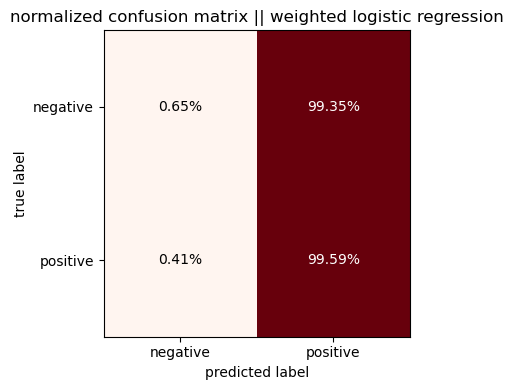

<Figure size 640x480 with 0 Axes>

In [41]:
fig, ax = plt.subplots(figsize=(5, 4))

im = ax.imshow(cm_norm, cmap="Reds")

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])

ax.set_xticklabels(["negative", "positive"])
ax.set_yticklabels(["negative", "positive"])

ax.set_xlabel("predicted label")
ax.set_ylabel("true label")
ax.set_title("normalized confusion matrix || weighted logistic regression")

for i in range(2):
    for j in range(2):
        value = cm_norm[i, j]
        ax.text(
            j,
            i,
            f"{value:.2%}",
            ha="center",
            va="center",
            color="white" if value > 0.4 else "black",
        )

plt.tight_layout()
plt.show()



plt.tight_layout()
plt.show()

In [ ]:
IMAGES_DIR = PROJECT_ROOT / "images"
IMAGES_DIR.mkdir(exist_ok=True)

output_path = IMAGES_DIR / "confusion_matrix_logreg.png"

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(5, 4))

ax.imshow(cm_norm, cmap="Reds")

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])

ax.set_xticklabels(["negative", "positive"])
ax.set_yticklabels(["negative", "positive"])

ax.set_xlabel("predicted label")
ax.set_ylabel("true label")
ax.set_title("normalized confusion matrix – weighted logistic regression")

for i in range(2):
    for j in range(2):
        value = cm_norm[i, j]
        ax.text(
            j,
            i,
            f"{value:.2%}",
            ha="center",
            va="center",
            color="white" if value > 0.4 else "black",
        )

plt.tight_layout()
plt.savefig(output_path, dpi=150, bbox_inches="tight")
plt.close()

output_path


PosixPath('../images/confusion_matrix_logreg.png')